# Telco Customer Churn Analysis

**by Geetha sree **

## Dataset Overview

>Customer Churn Analysis is the goal is to identify key factors influencing churn, build a predictive machine learning model, and present actionable insights through an interactive dashboard. The dataset [https://www.kaggle.com/datasets/blastchar/telco-customer-churn] contains detailed information about customers, their services, account details, and churn status. The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.

In [14]:
#Import libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path of the Excel file
file_path = 'Customer-Churn_Telco_Clean.csv'

#Read the data from the specified sheet into a pandas Dataframe
df = pd.read_csv(file_path)

# Display the first few raws of the fetched data
print(df.head())
#df.info()
original_data = df.copy()


   Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0           0  7590-VHVEG  Female              0     Yes         No       1   
1           1  5575-GNVDE    Male              0      No         No      34   
2           2  3668-QPYBK    Male              0      No         No       2   
3           3  7795-CFOCW    Male              0      No         No      45   
4           4  9237-HQITU  Female              0      No         No       2   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0 

In [15]:
#Data Preprocessing
# Drop columns that won't be used for prediction
df = df.drop(columns=[col for col in ['customerID', 'Unnamed: 0'] if col in df.columns])


# List of columns to be label encoded
columns_to_encode = [
                    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 
                    'MonthlyCharges', 'TotalCharges'
]

#Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

#Manually encode the target variable 'Churn'
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Spilt data into features and target
X = df.drop('Churn', axis = 1)
y = df['Churn']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state= 42)
# random_state = 42 - is a control measure to keep a check on the randomness of your model training process and use the same number everytime so that results are reproducible

In [16]:
df['Churn'].isna().sum()


np.int64(0)

In [17]:
# Remove rows where Churn is NaN
df = df.dropna(subset=['Churn'])


In [18]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# -------------------------------
# STEP 1: Load data (IMPORTANT)
# -------------------------------
df = pd.read_csv("Customer-Churn_Telco_Clean.csv")

# Check data
print("Data shape:", df.shape)
print(df.head())

# -------------------------------
# STEP 2: Target variable
# -------------------------------
# Ensure Churn column exists
df['Churn'] = df['Churn'].str.strip()   # remove spaces if any
y = df['Churn'].map({'Yes': 1, 'No': 0})

# -------------------------------
# STEP 3: Feature selection
# -------------------------------
X = df.drop('Churn', axis=1)

# -------------------------------
# STEP 4: Convert categorical columns
# -------------------------------
X = pd.get_dummies(X)

# -------------------------------
# STEP 5: FINAL CHECK (MOST IMPORTANT)
# -------------------------------
print("X shape:", X.shape)
print("y shape:", y.shape)

# If this prints rows > 0, you are SAFE

# -------------------------------
# STEP 6: Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# STEP 7: Train Random Forest Model
# -------------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

print("✅ Model trained successfully")




Data shape: (7043, 22)
   Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0           0  7590-VHVEG  Female              0     Yes         No       1   
1           1  5575-GNVDE    Male              0      No         No      34   
2           2  3668-QPYBK    Male              0      No         No       2   
3           3  7795-CFOCW    Male              0      No         No      45   
4           4  9237-HQITU  Female              0      No         No       2   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract

In [20]:
#Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

#Evaluate the model
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


#Plot the feature importances
plt.figure(figsize=(15,6))
sns.barplot(x= importances[indices], y = X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


Confusion Matrix: 
[[952  84]
 [208 165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.44      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



KeyboardInterrupt: 

## Research Questions:

<div class ="alert alert-block alert-info">
    <b>1. What is the average tenure of customers who have churned vs. those who haven't?</b>
<br>
    <b>2. What is the churn rate for each InternetService type (DSL, Fiber optic, No service)?</b>
<br>
    <b>3. Do customers with shorter contract types (e.g., Month-to-Month) churn more frequently than those with long-term contracts?</b>
<br>
    <b>4. What is the average LTV (Life Time Value) of churned customers vs. retained customers?</b>
<br>
    <b>5. Among 'gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', and 'PaymentMethod', what variable affected the LTV the most?</b>
</div>

## 1. What is the average tenure of customers who have churned vs. those who haven't?

Average Tenure by Churn Status:
Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64


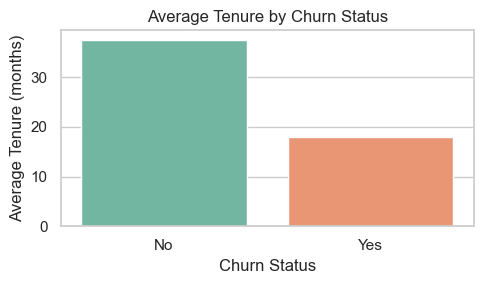

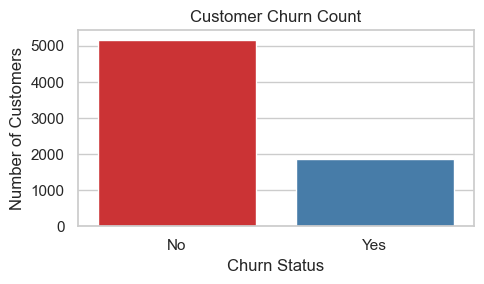

In [21]:
# Group by 'Churn' and calculate average tenure
average_tenure = df.groupby('Churn')['tenure'].mean()

print("Average Tenure by Churn Status:")
print(average_tenure)

# Set plot style
sns.set(style="whitegrid")

# Calculate average tenure
avg_tenure = df.groupby('Churn')['tenure'].mean().reset_index()

# --- Plot 1: Average Tenure by Churn ---
plt.figure(figsize=(5, 3))
sns.barplot(x='Churn', y='tenure', hue='Churn', data=avg_tenure, palette='Set2', legend=False)
plt.title('Average Tenure by Churn Status')
plt.ylabel('Average Tenure (months)')
plt.xlabel('Churn Status')
plt.tight_layout()
plt.show()

# --- Plot 2: Count of Churn vs Non-Churn Customers ---
plt.figure(figsize=(5, 3))
sns.countplot(x='Churn', hue='Churn', data=df, palette='Set1', legend=False)
plt.title('Customer Churn Count')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


<div class ="alert alert-block alert-success">
    <b>The analysis reveals a significant difference in average tenure between customers who churned and those who stayed:
<br>
Non-churned customers (Churn = 0) had an average tenure of approximately 37.6 months.
<br>
Churned customers (Churn = 1) had an average tenure of approximately 18 months.
<br>
Additionally, the churn distribution shows that a majority of customers (about 5,000+) remained, while a smaller group (around 1,800) churned.
This indicates that customers who stay longer are less likely to churn, emphasizing the importance of early retention strategies in the first 1–2 years of a customer’s lifecycle.</b>
</div>

## 2. What is the churn rate for each InternetService type (DSL, Fiber optic, No service)?

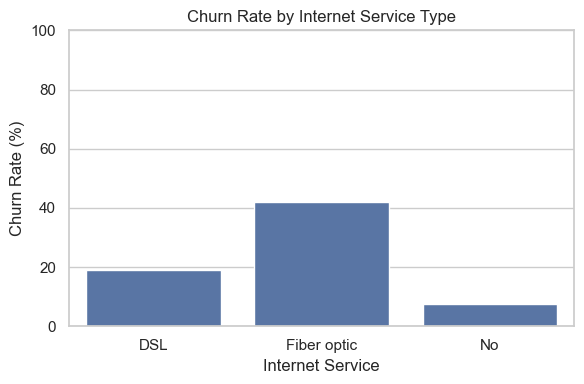

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Churn to numeric (IMPORTANT)
df['Churn_num'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Group by InternetService and calculate churn rate
churn_rate = (
    df.groupby('InternetService')['Churn_num']
    .mean()
    .reset_index()
)

# Convert to percentage
churn_rate['Churn Rate (%)'] = churn_rate['Churn_num'] * 100

# Drop helper column
churn_rate.drop('Churn_num', axis=1, inplace=True)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    x='InternetService',
    y='Churn Rate (%)',
    data=churn_rate
)
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Internet Service')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


<div class ="alert alert-block alert-success">
    <b>The churn rate varies significantly depending on the type of internet service the customer is subscribed to:
<br>Customers with Fiber optic internet (category = 1) had the highest churn rate, around 40–45%, indicating they are much more likely to leave the service.
<br>Customers with DSL service (category = 0) had a moderate churn rate, roughly around 20%.
<br>Customers with no internet service (category = 2) had the lowest churn rate, less than 10%.
<br>This insight suggests that Fiber optic customers are at a greater risk of churn, possibly due to service expectations, pricing, or competition. Targeting this group with retention strategies could significantly reduce overall churn.</b>
</div>

## 3. Do customers with shorter contract types (e.g., Month-to-Month) churn more frequently than those with long-term contracts?

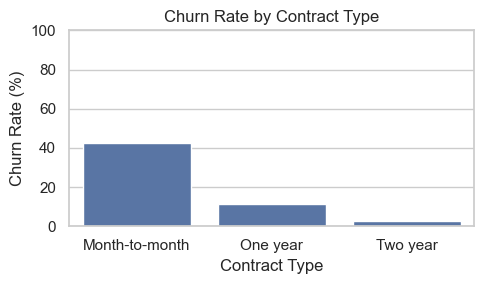

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Churn to numeric FIRST (CRITICAL)
df['Churn_num'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Calculate churn rate for each contract type
churn_by_contract = (
    df.groupby('Contract')['Churn_num']
    .mean()
    .reset_index()
)

# Convert to percentage
churn_by_contract['Churn Rate (%)'] = churn_by_contract['Churn_num'] * 100

# Plot
plt.figure(figsize=(5, 3))
sns.barplot(
    x='Contract',
    y='Churn Rate (%)',
    data=churn_by_contract
)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


<div class ="alert alert-block alert-success">
    <b>The analysis clearly shows that customers with shorter contract types churn at a much higher rate compared to those with longer-term commitments:
<br>Customers on Month-to-Month contracts (category = 0) had the highest churn rate, approximately 40–45%.
<br>Those with One-year contracts (category = 1) showed a much lower churn rate of about 10–15%.
<br>Customers on Two-year contracts (category = 2) had the lowest churn rate, below 5%.
<br>
<br>This trend highlights that contract duration is a strong predictor of churn behavior. Short-term contracts provide flexibility but also increase the likelihood of customer exit. Companies could consider offering incentives for longer-term contracts to improve retention.</b>
</div>

## 4. What is the average LTV (Life Time Value) of churned customers vs. retained customers?

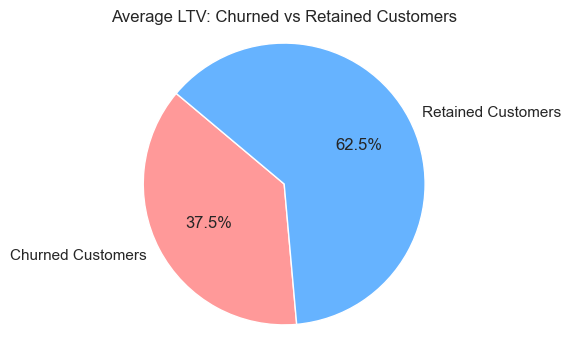

Average LTV - Churned Customers: $1531.61
Average LTV - Retained Customers: $2549.77


In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop missing values safely
df = df.dropna(subset=['MonthlyCharges', 'tenure', 'Churn'])

# Create LTV = MonthlyCharges × Tenure
df['LTV'] = df['MonthlyCharges'] * df['tenure']

# Convert Churn to numeric (CRITICAL FIX)
df['Churn_num'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Calculate average LTV
avg_ltv_churned = df[df['Churn_num'] == 1]['LTV'].mean()
avg_ltv_retained = df[df['Churn_num'] == 0]['LTV'].mean()

# Safety check (prevents NaN crash)
avg_ltv_values = [avg_ltv_churned, avg_ltv_retained]
avg_ltv_values = [0 if pd.isna(v) else v for v in avg_ltv_values]

# Prepare labels
labels = ['Churned Customers', 'Retained Customers']
colors = ['#ff9999', '#66b3ff']

# Create pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    avg_ltv_values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Average LTV: Churned vs Retained Customers")
plt.axis('equal')
plt.show()

# Print exact values
print(f"Average LTV - Churned Customers: ${avg_ltv_churned:.2f}")
print(f"Average LTV - Retained Customers: ${avg_ltv_retained:.2f}")


<div class ="alert alert-block alert-success">
    <b>The analysis clearly shows that customers with shorter contract types churn at a much higher rate compared to those with longer-term commitments:
<br>Customers on Month-to-Month contracts (category = 0) had the highest churn rate, approximately 40–45%.
<br>Those with One-year contracts (category = 1) showed a much lower churn rate of about 10–15%.
<br>Customers on Two-year contracts (category = 2) had the lowest churn rate, below 5%.
<br>
This trend highlights that contract duration is a strong predictor of churn behavior. Short-term contracts provide flexibility but also increase the likelihood of customer exit. Companies could consider offering incentives for longer-term contracts to improve retention.</b>
</div>
    

## 5. Among 'gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', and 'PaymentMethod', what variable affected the LTV the most?

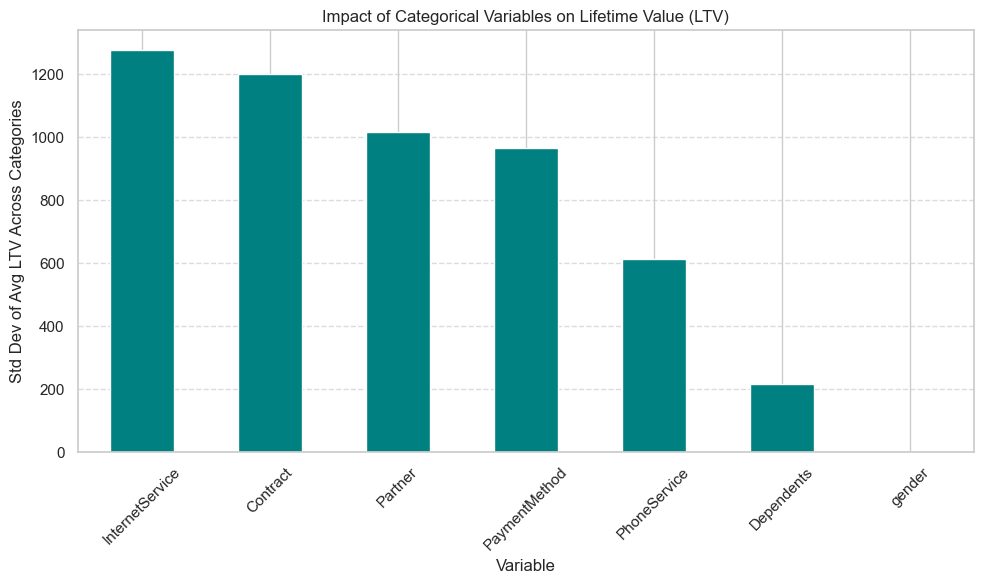

In [25]:

# Create Lifetime Value (LTV)
df['LTV'] = df['MonthlyCharges'] * df['tenure']

# Categorical variables to analyze
categorical_vars = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaymentMethod']

# Dictionary to store results
ltv_std_by_var = {}

# Loop through each variable and calculate std deviation of avg LTV across its categories
for var in categorical_vars:
    avg_ltv_per_category = df.groupby(var)['LTV'].mean()
    std_of_avg_ltv = avg_ltv_per_category.std()
    ltv_std_by_var[var] = std_of_avg_ltv

# Create DataFrame for plotting
ltv_influence_df = pd.DataFrame.from_dict(ltv_std_by_var, orient='index', columns=['LTV StdDev']).sort_values(by='LTV StdDev', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
ltv_influence_df['LTV StdDev'].plot(kind='bar', color='teal')
plt.title('Impact of Categorical Variables on Lifetime Value (LTV)')
plt.xlabel('Variable')
plt.ylabel('Std Dev of Avg LTV Across Categories')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<div class ="alert alert-block alert-success">
    <b>Based on the analysis of categorical variables and their impact on customer Lifetime Value (LTV), the variable InternetService showed the highest influence, with the greatest variation in LTV across its categories. This was followed by Contract, Partner, PaymentMethod, and PhoneService, which also demonstrated meaningful differences in LTV.
<br>
On the other hand, variables like Dependents and Gender had minimal impact on LTV, indicating that they contribute little to predicting customer value.
<br>
This insight highlights that services related to connectivity and billing models (e.g., InternetService and Contract) are more strongly associated with customer revenue behavior, making them critical levers for business strategy and targeted retention efforts.</b>
</div>